In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential as Seq
from keras.layers import Dense
from keras.constraints import unit_norm #to force weights to have a magnitude of 1.0
from keras.optimizers import SGD 
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical

Using TensorFlow backend.


# Importing and Preprocessing Data

In [2]:
path = '../Codes/'
filename = 'semeionCSV.csv'
df = pd.read_csv(path+filename)
print(df.shape) #checking the shape of the dataset
print(len(df)) # checking if the full rows of the data was imported  

(1592, 266)
1592


In [3]:
pd.set_option('display.max_columns', 266)
#print(df.head()) #printing out few entries of the data from the top row eventhough have accessed it in notpad and excel++
#print(df.tail()) #printing out few entries of the data from the bottom row eventhough have accessed it in notpad++

In [4]:
#Check if there is column tht contains all zeros
df = df.loc[:, (df != 0).any(axis=0)]
#print(df.shape) #checking the shape of the dataset

### Dividing the Dataset into Predictor and Response Variable

In [5]:
Dependent = df[df.columns[256:]].copy()
#print(Dependent)

In [6]:
Independent = df[df.columns[:256]].copy()
#print(Independent)

# Question 3 

**Standardize** (to regress the data mean to 0 and standard deviation to 1) the features so that the model can converge fast 

In [7]:
standardize = preprocessing.StandardScaler().fit(Independent)
Independent = standardize.transform(Independent)
#print(Independent)

C:\Users\CHERPENS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\CHERPENS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [8]:
Independent.shape

(1592, 256)

**Creating Training and Testing Set**

In [9]:
#Split the Data into Training and Testing Set 70/30 respectively 
Indep_train, Indep_test, Dep_train, Dep_test = train_test_split(Independent, Dependent, test_size=0.30, random_state=0)

In [22]:
NN_Model_IM = Seq()

In [23]:
#Adding 50 Hidden and 10 output layers to the model
NN_Model_IM.add(Dense(100, input_dim = 256, bias_constraint = unit_norm(axis = 0),
                   activation = 'sigmoid'))
NN_Model_IM.add(Dense(10, bias_constraint = unit_norm(axis = 0), activation = 'sigmoid'))

In [24]:
BPSGD_opt = SGD(lr = 1) #Set the learning rate to 0.1

**Model Compilation**

In [25]:
NN_Model_IM.compile(optimizer = BPSGD_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
NN_Model_IM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________


**Fitting the NN Model**

In [27]:
NN_Model_Capture = NN_Model_IM.fit(Indep_train, Dep_train, epochs = 50, 
                                validation_data = (Indep_test, Dep_test))

Instructions for updating:
Use tf.cast instead.
Train on 1114 samples, validate on 478 samples
Epoch 1/50
1114/1114 [==============================] - 0s 357us/step - loss: 1.1611 - acc: 0.6400 - val_loss: 0.7182 - val_acc: 0.7469
Epoch 2/50
1114/1114 [==============================] - 0s 53us/step - loss: 0.2635 - acc: 0.9291 - val_loss: 0.3730 - val_acc: 0.8745
Epoch 3/50
1114/1114 [==============================] - 0s 52us/step - loss: 0.1275 - acc: 0.9785 - val_loss: 0.2654 - val_acc: 0.9079
Epoch 4/50
1114/1114 [==============================] - 0s 56us/step - loss: 0.0742 - acc: 0.9910 - val_loss: 0.2779 - val_acc: 0.9121
Epoch 5/50
1114/1114 [==============================] - 0s 52us/step - loss: 0.0485 - acc: 0.9973 - val_loss: 0.2456 - val_acc: 0.9247
Epoch 6/50
1114/1114 [==============================] - 0s 53us/step - loss: 0.0328 - acc: 0.9991 - val_loss: 0.2381 - val_acc: 0.9247
Epoch 7/50
1114/1114 [==============================] - 0s 52us/step - loss: 0.0251 - acc: 1.0

#### Accuracy on Training AND Test Set

In [28]:
loss, accuracy = NN_Model_IM.evaluate(Indep_train, Dep_train, verbose=0)
print("Accuracy for Training Set: "+"{:.4f}".format(accuracy))
print("'Loss for Training Set: "+"{:.4f}".format(loss))

Accuracy for Training Set: 1.0000
'Loss for Training Set: 0.0020


In [29]:
loss, accuracy = NN_Model_IM.evaluate(Indep_test, Dep_test, verbose=0)
print("Accuracy for Test Set: "+"{:.4f}".format(accuracy))
print("Loss for Test Set: "+"{:.4f}".format(loss))

Accuracy for Test Set: 0.9268
Loss for Test Set: 0.2517


#### Confusion Matrix

In [30]:
Dependent_Pred = NN_Model_IM.predict(Indep_test)
Predicted_classes = np.argmax(Dependent_Pred, axis = 1)

In [31]:
Confusion_Matrix = confusion_matrix(Dep_test.values.argmax(axis=1), Predicted_classes)
Confusion_Matrix

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  1,  0,  1],
       [ 1,  0, 48,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 36,  1,  2,  0,  0,  0,  2],
       [ 0,  2,  0,  0, 48,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  2,  0, 49,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 1,  1,  0,  0,  2,  0,  0, 37,  0,  0],
       [ 1,  1,  4,  0,  0,  0,  0,  1, 39,  1],
       [ 1,  1,  0,  3,  0,  0,  0,  1,  1, 46]], dtype=int64)

#### Summarized Result on the Test Set

In [32]:
Summarized_Result = classification_report(Dep_test.values.argmax(axis=1), Predicted_classes)
print(Summarized_Result)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        49
           1       0.90      0.96      0.93        47
           2       0.92      0.96      0.94        50
           3       0.88      0.88      0.88        41
           4       0.94      0.92      0.93        52
           5       0.96      0.94      0.95        52
           6       0.98      1.00      0.99        46
           7       0.93      0.90      0.91        41
           8       0.93      0.83      0.88        47
           9       0.90      0.87      0.88        53

   micro avg       0.93      0.93      0.93       478
   macro avg       0.93      0.93      0.93       478
weighted avg       0.93      0.93      0.93       478



#### Give a plot of both training and test accuracy as a function of epoch number (graph both of these on sample plot).

In [33]:
Capture_acc = NN_Model_Capture.history['acc']
Capture_val_acc = NN_Model_Capture.history['val_acc']
Capture_loss = NN_Model_Capture.history['loss']
Capture_val_loss = NN_Model_Capture.history['val_loss']
epochs = range(1, len(Capture_acc) + 1)

<Figure size 432x288 with 0 Axes>

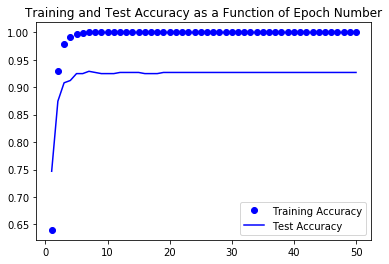

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(epochs, Capture_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, Capture_val_acc, 'b', label = 'Test Accuracy')
plt.title('Training and Test Accuracy as a Function of Epoch Number')
plt.legend()
plt.figure()

**Just by Standardizing the dataset a model with the same parameters accuracies improved from;  0.9928 to 1 and losses regressed from 0.0973 to 0.0370 for the training set and the test set from 0.9121/ 0.2830 to 0.9310/0.2467 for accuracies and losses respectively. Hence I felt I did not need to  add  any more features and hyperparameters**

#### =============================================================================================================================

In [10]:
standardize = preprocessing.StandardScaler().fit(Independent)
Independent = standardize.transform(Independent)
#print(Independent)

In [11]:
Independent.shape

(1592, 256)

**Creating Training and Testing Set**

In [12]:
#Split the Data into Training and Testing Set 70/30 respectively 
Indep_train, Indep_test, Dep_train, Dep_test = train_test_split(Independent, Dependent, test_size=0.30, random_state=0)

In [13]:
NN_Model_IMLR = Seq()

In [14]:
#Adding 50 Hidden and 10 output layers to the model
NN_Model_IMLR.add(Dense(100, input_dim = 256, bias_constraint = unit_norm(axis = 0),
                   activation = 'sigmoid'))
NN_Model_IMLR.add(Dense(10, bias_constraint = unit_norm(axis = 0), activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
BPSGD_opt = SGD(lr = 1) #Set the learning rate to 0.1

**Model Compilation**

In [16]:
NN_Model_IMLR.compile(optimizer = BPSGD_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
NN_Model_IMLR.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________


In [18]:
from keras.callbacks import EarlyStopping
#def my_learning_rate(epoch, lrate):
    #return lrate
 
#lrs = LearningRateScheduler(my_learning_rate)
ES = EarlyStopping(monitor='val_loss', patience = 10)

**Fitting the NN Model**

In [19]:
NN_Model_Capture = NN_Model_IMLR.fit(Indep_train, Dep_train, epochs = 60, 
                                validation_data = (Indep_test, Dep_test),
                                    callbacks = [ES])

Instructions for updating:
Use tf.cast instead.
Train on 1114 samples, validate on 478 samples
Epoch 1/60
1114/1114 [==============================] - 0s 351us/step - loss: 1.2995 - acc: 0.5691 - val_loss: 0.5915 - val_acc: 0.8096
Epoch 2/60
1114/1114 [==============================] - 0s 70us/step - loss: 0.3326 - acc: 0.9013 - val_loss: 0.3183 - val_acc: 0.9059
Epoch 3/60
1114/1114 [==============================] - 0s 64us/step - loss: 0.1438 - acc: 0.9704 - val_loss: 0.2943 - val_acc: 0.9163
Epoch 4/60
1114/1114 [==============================] - 0s 61us/step - loss: 0.0873 - acc: 0.9883 - val_loss: 0.2630 - val_acc: 0.9226
Epoch 5/60
1114/1114 [==============================] - 0s 70us/step - loss: 0.0530 - acc: 0.9946 - val_loss: 0.2595 - val_acc: 0.9247
Epoch 6/60
1114/1114 [==============================] - 0s 65us/step - loss: 0.0368 - acc: 0.9973 - val_loss: 0.2516 - val_acc: 0.9268
Epoch 7/60
1114/1114 [==============================] - 0s 64us/step - loss: 0.0270 - acc: 0.9

#### Accuracy on Training AND Test Set

In [20]:
loss, accuracy = NN_Model_IMLR.evaluate(Indep_train, Dep_train, verbose=0)
print("Accuracy for Training Set: "+"{:.4f}".format(accuracy))
print("'Loss for Training Set: "+"{:.4f}".format(loss))

Accuracy for Training Set: 1.0000
'Loss for Training Set: 0.0069


In [21]:
loss, accuracy = NN_Model_IMLR.evaluate(Indep_test, Dep_test, verbose=0)
print("Accuracy for Test Set: "+"{:.4f}".format(accuracy))
print("Loss for Test Set: "+"{:.4f}".format(loss))

Accuracy for Test Set: 0.9205
Loss for Test Set: 0.2514


**Even though just by  Standardizing the dataset a model with the same parameters accuracies improved from;  0.9928 to 1 and losses regressed from 0.0973 to 0.0370 for the training set and the test set from 0.9121/ 0.2830 to 0.9310/0.2467 for accuracies and losses respectively. I decided to see if by experimenting with some features and hyperparameters if the gap between training and test could be smaller than what I got with my initial proved model but it was a fruitless exercise but loss for training set regressed to 0.0062, the only positive.  Examples of some of the hyperparameters there were introduced were left as comments in the code.**